In [1]:
import pandas as pd
import scipy.stats

In [2]:
data = pd.read_csv("../full_variants/dsqtls.yoruba.lcls.benchmarking.all.tsv", sep="\t", header=0)

In [3]:
data.head(1)

,var.chrom,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
0,chr1,856583,A,G,rs141671872,1,True,0.9301,2.653531,0.000342,...,0.248566,0.044994,0.021877,0.127298,0.291935,0.067401,0.00484,0.065098,0.049902,0.00136


In [4]:
dataf = data[data["var.isused"]]

In [5]:
dataf.shape

(27373, 45)

In [6]:
print(sum(dataf["obs.label"]==1))
print(sum(dataf["obs.label"]==-1))

560
26813


# AUPRC Benchmarking

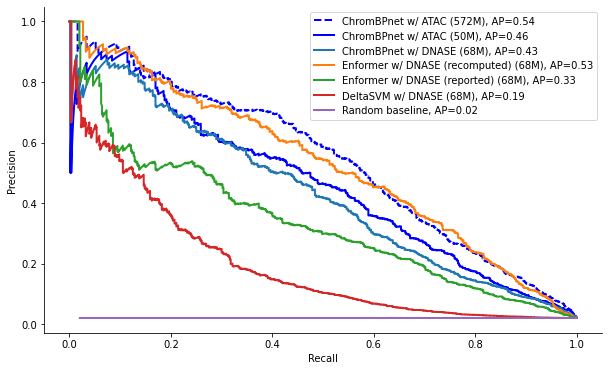

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve


fig, ax = plt.subplots(figsize=(10,6))

######################################

keyd="pred.chrombpnet.encsr637xsc.varscore.ips"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ ATAC (572M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.chrombpnet.encsr637xsc_50m.varscore.ips"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ ATAC (50M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.chrombpnet.encsr000emt.varscore.ips"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ DNASE (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.enformer.encsr000emt.varscore.local_logfc"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])
title="Enformer w/ DNASE (recomputed) (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
enformer_auc_recomp = roc_auc

ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

# keyd="pred.enformer.encsr000emt.varscore.sad"
# label=dataf["obs.label"].astype(int)
# score=abs(dataf[keyd])
# title="Enformer w/ DNASE SAD (50M)"

# fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
# roc_auc = metrics.average_precision_score(label, score)
# ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.enformer.encsr000emt.varscore.global_sar"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])
title="Enformer w/ DNASE (reported) (68M)"


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))
enformer_auc = roc_auc

######################################

keyd="pred.gkmsvm.encsr000emt.varscore.deltasvm"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])
title="DeltaSVM w/ DNASE (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))
deltasvm_roc=roc_auc

roc_auc=sum(dataf["obs.label"]==1)/len(dataf["obs.label"])
ax.plot(fpr_chrombpnet, [sum(dataf["obs.label"]==1)/len(dataf["obs.label"])]*len(fpr_chrombpnet), linewidth=2, label="Random baseline, AP="+str(round(roc_auc,2)))


ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc='upper right')
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

plt.savefig("subfigs/dsqtls_auprc.pdf", transparent=True, dpi=300)

# AUPRC (best metric)

In [8]:
scores = []
labels = []
keys_df = []

keys = ['pred.chrombpnet.encsr637xsc.varscore.ips',
       'pred.chrombpnet.encsr637xsc.varscore.ies',
       'pred.chrombpnet.encsr637xsc.varscore.jsd_x_aaq',
       'pred.chrombpnet.encsr637xsc.varscore.logfc_x_aaq',
       'pred.chrombpnet.encsr637xsc.varscore.jsd',     
       'pred.chrombpnet.encsr637xsc.varscore.logfc',
       'pred.chrombpnet.encsr637xsc.varscore.aaq']


key_shorts = ["IPS", 
              "IES",
              "jsd_x_aaq",
              "logfc_x_aaq",
              "jsd",
              "logfc",
              "AAQ"]

names = ["ATAC (572M)", "ATAC (50M)", "DNASE (50M)"]

j=0
for kd in keys:
    i = 0
    for title in ["encsr637xsc", "encsr637xsc_50m", "encsr000emt"]:
        label=data["obs.label"].astype(int)
        score=abs(data[kd.replace("encsr637xsc", title)])
        roc_auc = metrics.average_precision_score(label, score)
        scores.append(roc_auc)
        labels.append(names[i])
        keys_df.append(key_shorts[j])
        i=i+1
    j=j+1

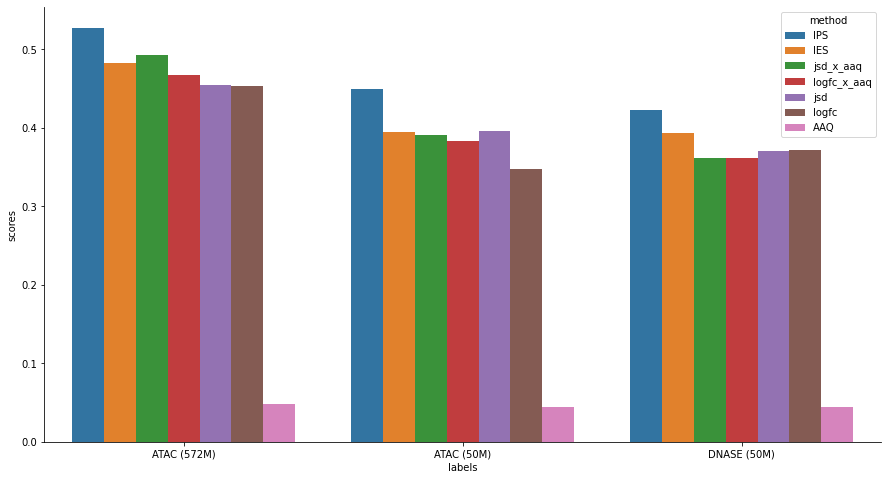

In [9]:
import seaborn as sns
dictt={"scores":scores, "labels":labels, "method":keys_df}
df = pd.DataFrame(dictt)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(data=df, x="labels", y="scores", hue="method", ax=ax)
ax.spines[["top", "right"]].set_visible(False)

plt.savefig("subfigs/dsqtls_auprc_score_compare.pdf", transparent=True, dpi=300)

In [10]:
dataf["obs.label"].astype(int)

0        1
1        1
2        1
3        1
4        1
        ..
28302   -1
28303   -1
28304   -1
28305   -1
28307   -1
Name: obs.label, Length: 27373, dtype: int64

In [11]:
keyd="pred.chrombpnet.encsr000emt.varscore.ips"
score=dataf[keyd]

(array([2.6739e+04, 6.0000e+01, 8.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.90406164e-11, 2.06203065e-02, 4.12406129e-02, 6.18609193e-02,
        8.24812258e-02, 1.03101532e-01, 1.23721839e-01, 1.44342145e-01,
        1.64962451e-01, 1.85582758e-01, 2.06203064e-01]),
 <BarContainer object of 10 artists>)

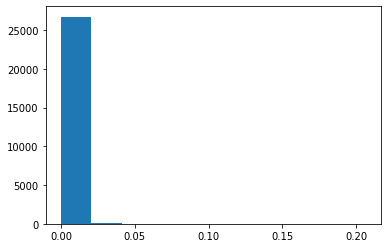

In [12]:
plt.hist(score[dataf["obs.label"].astype(int)==-1])

In [13]:
sum(score[dataf["obs.label"].astype(int)==-1]>0.025)

55

In [14]:
sum(score[dataf["obs.label"].astype(int)==1]>0.025)

119

(array([456.,  63.,  21.,  11.,   4.,   1.,   2.,   1.,   0.,   1.]),
 array([1.07273470e-06, 2.82166130e-02, 5.64321533e-02, 8.46476936e-02,
        1.12863234e-01, 1.41078774e-01, 1.69294314e-01, 1.97509855e-01,
        2.25725395e-01, 2.53940935e-01, 2.82156476e-01]),
 <BarContainer object of 10 artists>)

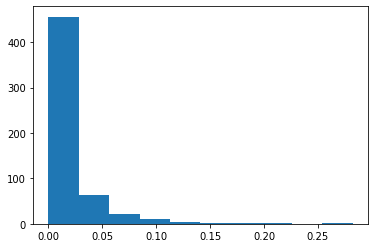

In [15]:
plt.hist(score[dataf["obs.label"].astype(int)==1])

# AUPRC (subsampling)

In [16]:
def fetch_auprc_new(p):
    fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac[key_label], abs(merged_atac["abs_logfc_x_jsd_x_max_percentile.mean"]))
    roc_auc = metrics.average_precision_score(merged_atac[key_label], abs(merged_atac["abs_logfc_x_jsd_x_max_percentile.mean"]))
    #roc_auc = metrics.average_precision_score(merged_atac[key_label], abs(merged_atac["jsd.mean"]))
    print(roc_auc)
    return roc_auc

In [17]:
rocs = []
for title in ["encsr637xsc", "encsr637xsc_250m", "encsr637xsc_100m",
              "encsr637xsc_50m", "encsr637xsc_25m", "encsr637xsc_5m", "encsr000emt"]:
    
    roc_auc = metrics.average_precision_score(dataf["obs.label"].astype(int), abs(dataf["pred.chrombpnet.encsr637xsc.varscore.ips".replace("encsr637xsc", title)]))
    print(roc_auc)
    rocs.append(roc_auc)

0.5382377424514815
0.5212720206135839
0.5130607361102206
0.4573954341174485
0.4172765936392213
0.289267529781573
0.42936897087849046


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


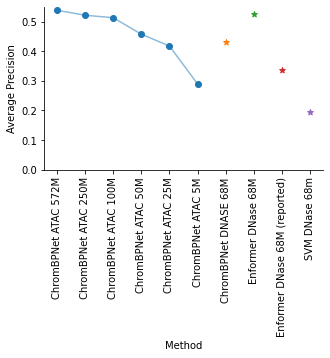

In [18]:
fix, ax = plt.subplots(figsize=(5,3))
ax.scatter(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M" ,"ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],rocs[0:-1])
ax.plot(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M","ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],rocs[0:-1], alpha=0.5)
ax.scatter(["DNASE\n68M"], [rocs[-1]], marker="*")
ax.scatter(["Enformer recomp"], [enformer_auc_recomp], marker="*")
ax.scatter(["Enformer"], [enformer_auc], marker="*")
ax.scatter(["DeltSVM"], [deltasvm_roc], marker="*")

xtix=["ChromBPNet ATAC 572M", " ChromBPNet ATAC 250M", "ChromBPNet ATAC 100M","ChromBPNet ATAC 50M", "ChromBPNet ATAC 25M", "ChromBPNet ATAC 5M"]+["ChromBPNet DNASE 68M"]+["Enformer DNase 68M"]+["Enformer DNase 68M (reported)"]+["SVM DNase 68m"]

ax.set_ylim((0,0.55))
ax.spines[["top", "right"]].set_visible(False)
ax.set_xticklabels(labels=xtix, rotation=90)
ax.set_xlabel("Method")
ax.set_ylabel("Average Precision")

plt.savefig("subfigs/dsqtls_auprc_subsampling.pdf", transparent=True, dpi=300)


# Pearsonr (benchmarking)

In [19]:

key_enf_1="pred.enformer.encsr000emt.varscore.local_logfc"
key_enf_2="pred.enformer.encsr000emt.varscore.global_sar"
key_label="obs.label"
obs_estimate="obs.estimate"
chrombpnet_logfc="pred.chrombpnet.encsr000emt.varscore.logfc"
chrombpnet_atac_logfc="pred.chrombpnet.encsr637xsc.varscore.logfc"
delta_svm_key="pred.gkmsvm.encsr000emt.varscore.deltasvm"
chrombpnet_atac_50m_logfc="pred.chrombpnet.encsr637xsc_50m.varscore.logfc"


# enformer_perf = np.max([scipy.stats.pearsonr(dataf[key_enf_1][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])[0],
#                        scipy.stats.pearsonr(dataf[key_enf_2][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])[0]])
enformer_perf = scipy.stats.pearsonr(dataf[key_enf_1][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])[0]
enformer_perf_old = scipy.stats.pearsonr(dataf[key_enf_2][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])[0]

print(np.round(enformer_perf,2))

0.73


In [20]:
#enformer_perf = scipy.stats.pearsonr(abs(dataf[key_enf_1][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))[0]


In [21]:

#print(np.round(enformer_perf,2))

In [22]:
print(np.round(enformer_perf_old,2))

0.56


In [23]:
scipy.stats.pearsonr(dataf[key_enf_1][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])

(0.727161386520316, 3.1602503587966174e-93)

In [24]:
scipy.stats.pearsonr(dataf[key_enf_2][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])

(0.563128780419175, 3.625037841934576e-48)

In [25]:
scipy.stats.pearsonr(dataf[chrombpnet_logfc][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])


(0.7393262959574392, 6.552289684724055e-98)

In [26]:
scipy.stats.pearsonr(dataf[chrombpnet_atac_logfc][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])


(0.7586179164294138, 6.689376032748603e-106)

In [27]:
scipy.stats.pearsonr(dataf[delta_svm_key][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])


(0.7318756523100427, 5.1915505043409464e-95)

In [28]:

# enformer_perf_abs = np.max([scipy.stats.pearsonr(abs(dataf[key_enf_1][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))[0],
#                        scipy.stats.pearsonr(abs(dataf[key_enf_2][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))[0]])
enformer_perf_abs = scipy.stats.pearsonr(abs(dataf[key_enf_1][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))[0]
enformer_perf_abs_old = scipy.stats.pearsonr(abs(dataf[key_enf_2][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))[0]

print(np.round(enformer_perf_abs,2))
print(scipy.stats.pearsonr(abs(dataf[key_enf_2][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1])))



0.2
(0.029602416955412617, 0.4844839205202049)


In [29]:
print(np.round(enformer_perf_abs_old,2))


0.03


In [30]:
deltasvm_perf = scipy.stats.pearsonr(dataf[delta_svm_key][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])[0]
print(np.round(deltasvm_perf,2))

0.73


In [31]:
deltasvm_perf_abs = scipy.stats.pearsonr(abs(dataf[delta_svm_key][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))
print(np.round(deltasvm_perf_abs[0],2))
print(deltasvm_perf_abs)

0.19
(0.19358920550964032, 3.937682048147411e-06)


In [32]:
chrombpnet_perf = scipy.stats.pearsonr(dataf[chrombpnet_logfc][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])[0]
print(np.round(chrombpnet_perf,2))

0.74


In [33]:
chrombpnet_perf_abs = scipy.stats.pearsonr(abs(dataf[chrombpnet_logfc][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))
print(np.round(chrombpnet_perf_abs[0],2))
print(chrombpnet_perf_abs)

0.25
(0.24688242752352538, 3.19703213636387e-09)


In [34]:
chrombpnet_perf = scipy.stats.pearsonr(dataf[chrombpnet_atac_50m_logfc][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])[0]
print(np.round(chrombpnet_perf,2))

0.73


In [35]:
chrombpnet_perf_abs = scipy.stats.pearsonr(abs(dataf[chrombpnet_atac_50m_logfc][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))
print(np.round(chrombpnet_perf_abs[0],2))
print(chrombpnet_perf_abs)

0.26
(0.2629603458940187, 2.608186148205023e-10)


In [36]:
scipy.stats.pearsonr(abs(dataf[chrombpnet_atac_logfc][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))


(0.29208596203522214, 1.7776064659066986e-12)

(560, 2)
(0.7586179164294138, 6.689376032748603e-106)
(0.29208596203522214, 1.7776064659066986e-12)


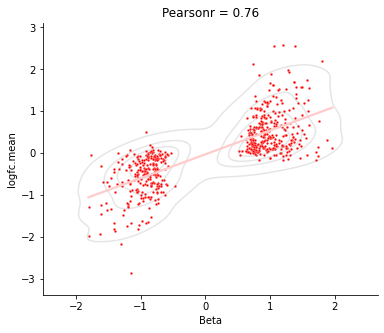

In [37]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

   
data = pd.DataFrame()
data["logfc.mean"] = dataf[dataf[key_label]==1][chrombpnet_atac_logfc]
data["Beta"] = dataf[dataf[key_label]==1][obs_estimate]

print(data.shape)
plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="Red")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#ffcccb")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(dataf[chrombpnet_atac_logfc][dataf[key_label]==1],dataf[obs_estimate][dataf[key_label]==1])
print(atc_pear)

ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))

atc_pear = scipy.stats.pearsonr(abs(dataf[chrombpnet_atac_logfc][dataf[key_label]==1]),abs(dataf[obs_estimate][dataf[key_label]==1]))
print(atc_pear)

plt.savefig("subfigs/dsqtls_pearsonr_plot.pdf", transparent=True, dpi=300)


# Pearsonr (subsampling)

In [38]:

pearsonrs_logfc_abs = []
for title in ["encsr637xsc", "encsr637xsc_250m", "encsr637xsc_100m",
              "encsr637xsc_50m", "encsr637xsc_25m", "encsr637xsc_5m", "encsr000emt"]:
  
    pear = scipy.stats.pearsonr(abs(dataf[obs_estimate][dataf[key_label]==1]), abs(dataf["pred.chrombpnet.encsr637xsc.varscore.logfc".replace("encsr637xsc", title)][dataf[key_label]==1]))
    print(pear)
    pearsonrs_logfc_abs.append(pear[0])


(0.29208596203522214, 1.7776064659066986e-12)
(0.27736493794097455, 2.3813009032720084e-11)
(0.2816781946705184, 1.1309775172641475e-11)
(0.2629603458940187, 2.608186148205023e-10)
(0.22931197960366534, 4.072532181264645e-08)
(0.13358803525401117, 0.0015327079153868628)
(0.24688242752352538, 3.19703213636387e-09)


In [39]:
pearsonrs_logfc = []
for title in ["encsr637xsc", "encsr637xsc_250m", "encsr637xsc_100m",
              "encsr637xsc_50m", "encsr637xsc_25m", "encsr637xsc_5m", "encsr000emt"]:
 
    print("pred.chrombpnet.encsr637xsc.varscore.logfc".replace("encsr637xsc", title))
    pear = scipy.stats.pearsonr(dataf[obs_estimate][dataf[key_label]==1], dataf["pred.chrombpnet.encsr637xsc.varscore.logfc".replace("encsr637xsc", title)][dataf[key_label]==1])
    print(pear)
    pearsonrs_logfc.append(pear[0])

pred.chrombpnet.encsr637xsc.varscore.logfc
(0.7586179164294138, 6.689376032748603e-106)
pred.chrombpnet.encsr637xsc_250m.varscore.logfc
(0.7526282890600602, 2.4287034191876065e-103)
pred.chrombpnet.encsr637xsc_100m.varscore.logfc
(0.7546672458842387, 3.328306684572512e-104)
pred.chrombpnet.encsr637xsc_50m.varscore.logfc
(0.7346524058027831, 4.429888240845516e-96)
pred.chrombpnet.encsr637xsc_25m.varscore.logfc
(0.7203103315262882, 1.0646610243625364e-90)
pred.chrombpnet.encsr637xsc_5m.varscore.logfc
(0.6681759905958633, 1.0998664422228002e-73)
pred.chrombpnet.encsr000emt.varscore.logfc
(0.7393262959574392, 6.552289684724055e-98)


In [40]:

pearsonrs_jsd_abs = []
for title in ["encsr637xsc", "encsr637xsc_250m", "encsr637xsc_100m",
              "encsr637xsc_50m", "encsr637xsc_25m", "encsr637xsc_5m", "encsr000emt"]:
    
    print("pred.chrombpnet.encsr637xsc.varscore.js".replace("encsr637xsc", title))
    pear = scipy.stats.pearsonr(abs(dataf[obs_estimate][dataf[key_label]==1]), abs(dataf["pred.chrombpnet.encsr637xsc.varscore.jsd".replace("encsr637xsc", title)][dataf[key_label]==1]))
    print(pear)
    pearsonrs_jsd_abs.append(pear[0])


pred.chrombpnet.encsr637xsc.varscore.js
(0.3126615207076874, 3.6450264964081094e-14)
pred.chrombpnet.encsr637xsc_250m.varscore.js
(0.31167966683860004, 4.418936333384774e-14)
pred.chrombpnet.encsr637xsc_100m.varscore.js
(0.30728724129706153, 1.0365589041469113e-13)
pred.chrombpnet.encsr637xsc_50m.varscore.js
(0.29859614231417875, 5.372085406673485e-13)
pred.chrombpnet.encsr637xsc_25m.varscore.js
(0.2864012022361328, 4.930507413208403e-12)
pred.chrombpnet.encsr637xsc_5m.varscore.js
(0.250890979852558, 1.7392825202867793e-09)
pred.chrombpnet.encsr000emt.varscore.js
(0.31380363966877345, 2.911008818617905e-14)


In [41]:

pearsonrs_jsd = []
for title in ["encsr637xsc", "encsr637xsc_250m", "encsr637xsc_100m",
              "encsr637xsc_50m", "encsr637xsc_25m", "encsr637xsc_5m", "encsr000emt"]:
    pear = scipy.stats.pearsonr(dataf[obs_estimate][dataf[key_label]==1], dataf["pred.chrombpnet.encsr637xsc.varscore.jsd".replace("encsr637xsc", title)][dataf[key_label]==1])
    print(pear)
    pearsonrs_jsd.append(pear[0])


(0.7480524783614502, 1.959293501864504e-101)
(0.7523651296928697, 3.1344639726513044e-103)
(0.7470599652802675, 5.014684226524033e-101)
(0.736694138893397, 7.108672678159656e-97)
(0.7256926640794923, 1.1169288396490585e-92)
(0.6726748364294816, 5.1375454552778505e-75)
(0.7575962676005736, 1.8506194777967972e-105)


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


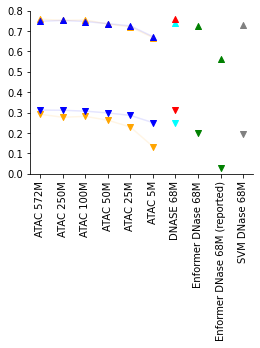

In [43]:
fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M" ,"ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_logfc[0:-1], c="orange", marker="^")
ax.plot(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M","ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_logfc[0:-1], alpha=0.1, c="orange")
ax.scatter(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M" ,"ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_jsd[0:-1], c="blue", marker="^")
ax.plot(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M","ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_jsd[0:-1], alpha=0.1, c="blue")

ax.scatter(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M" ,"ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_logfc_abs[0:-1], c="orange", marker="v")
ax.plot(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M","ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_logfc_abs[0:-1], alpha=0.1,c="orange")
ax.scatter(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M" ,"ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_jsd_abs[0:-1], c="blue", marker="v")
ax.plot(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M","ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],pearsonrs_jsd_abs[0:-1], alpha=0.1, c="blue" )


ax.scatter(["DNASE\n68M"], [pearsonrs_logfc[-1]],c="cyan",  marker="^")
ax.scatter(["DNASE\n68M"], [pearsonrs_jsd[-1]],c="red",  marker="^")
ax.scatter(["DNASE\n68M"], [pearsonrs_logfc_abs[-1]],c="cyan",  marker="v")
ax.scatter(["DNASE\n68M"], [pearsonrs_jsd_abs[-1]],c="red",  marker="v")

ax.scatter(["Enformer DNase\n68M"], [enformer_perf], c="green", marker="^")
ax.scatter(["Enformer DNase\n68M"], [enformer_perf_abs], c="green", marker="v")

ax.scatter(["Enformer DNase (reported)\n68M"], [enformer_perf_old], c="green", marker="^")
ax.scatter(["Enformer DNase (reported)\n68M"], [enformer_perf_abs_old], c="green", marker="v")


ax.scatter(["SVM DNase\n68M"], [deltasvm_perf], c="grey", marker="^")
ax.scatter(["SVM DNase\n68M"], [deltasvm_perf_abs[0]], c="grey",  marker="v")


xtix=["ATAC 572M", "ATAC 250M", "ATAC 100M","ATAC 50M", "ATAC 25M", "ATAC 5M"]+["DNASE 68M"]+["Enformer DNase 68M"]+["Enformer DNase 68M (reported)"]+["SVM DNase 68M"]
ax.set_ylim((0,0.8))
ax.spines[["top", "right"]].set_visible(False)
ax.set_xticklabels(labels=xtix, rotation=90)
#ax.legend()
plt.savefig("subfigs/dsqtls_subsample_pearsonr_performance.pdf", transparent=True, dpi=300)


pred.chrombpnet.encsr637xsc.varscore.logfc
[0.76 0.  ]
pred.chrombpnet.encsr637xsc_50m.varscore.logfc
[0.73 0.  ]
pred.chrombpnet.encsr000emt.varscore.logfc
[0.74 0.  ]
0.73
0.56


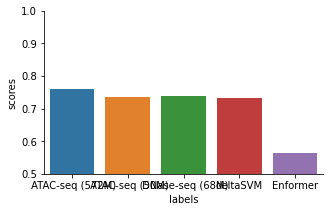

In [44]:
pearsonrs_logfc = []
for title in ["encsr637xsc", 
              "encsr637xsc_50m", "encsr000emt"]:
 
    print("pred.chrombpnet.encsr637xsc.varscore.logfc".replace("encsr637xsc", title))
    pear = scipy.stats.pearsonr(dataf[obs_estimate][dataf[key_label]==1], dataf["pred.chrombpnet.encsr637xsc.varscore.logfc".replace("encsr637xsc", title)][dataf[key_label]==1])
    print(np.round(pear,2))
    pearsonrs_logfc.append(pear[0])


import seaborn as sns

pearsonrs_logfc.extend([deltasvm_perf,enformer_perf_old])
labels = [" ATAC-seq (572M)",  " ATAC-seq (50M)", " DNase-seq (68M)", "deltaSVM", "Enformer" ]
dictt={"scores":pearsonrs_logfc, "labels":labels}
df = pd.DataFrame(dictt)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots(figsize=(5,3))
ax.set_ylim((0.5,1.0))
sns.barplot(data=df, x="labels", y="scores", ax=ax)

ax.spines[["top", "right"]].set_visible(False)

print(np.round(deltasvm_perf,2))
print(np.round(enformer_perf_old,2))

pred.chrombpnet.encsr637xsc.varscore.logfc
(0.7586179164294138, 6.689376032748603e-106)
pred.chrombpnet.encsr637xsc_50m.varscore.logfc
(0.7346524058027831, 4.429888240845516e-96)
pred.chrombpnet.encsr000emt.varscore.logfc
(0.7393262959574392, 6.552289684724055e-98)


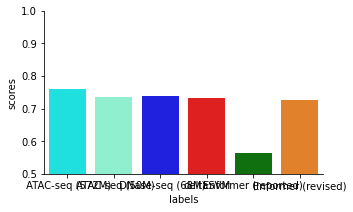

In [45]:
pearsonrs_logfc = []
for title in ["encsr637xsc", 
              "encsr637xsc_50m", "encsr000emt"]:
 
    print("pred.chrombpnet.encsr637xsc.varscore.logfc".replace("encsr637xsc", title))
    pear = scipy.stats.pearsonr(dataf[obs_estimate][dataf[key_label]==1], dataf["pred.chrombpnet.encsr637xsc.varscore.logfc".replace("encsr637xsc", title)][dataf[key_label]==1])
    print(pear)
    pearsonrs_logfc.append(pear[0])


import seaborn as sns

hue=["cyan"]+["#7FFFD4"]+["b"]+["red"]+["green"]+["#ff7f0e"]

pearsonrs_logfc.extend([deltasvm_perf,enformer_perf_old, enformer_perf])
labels = [" ATAC-seq (572M)",  " ATAC-seq (50M)", " DNase-seq (68M)", "deltaSVM", "Enformer (reported)", "Enformer (revised)" ]
dictt={"scores":pearsonrs_logfc, "labels":labels, "hue": hue}
df = pd.DataFrame(dictt)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots(figsize=(5,3))
ax.set_ylim((0.5,1.0))
sns.barplot(data=df, x="labels", y="scores", palette=hue, ax=ax)

ax.spines[["top", "right"]].set_visible(False)



pred.chrombpnet.encsr637xsc.varscore.logfc
(0.7586179164294138, 6.689376032748603e-106)
pred.chrombpnet.encsr637xsc_50m.varscore.logfc
(0.7346524058027831, 4.429888240845516e-96)
pred.chrombpnet.encsr000emt.varscore.logfc
(0.7393262959574392, 6.552289684724055e-98)


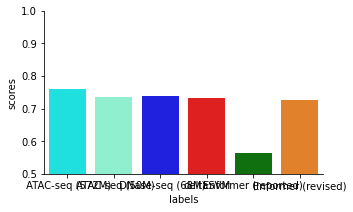

In [46]:
pearsonrs_logfc = []
for title in ["encsr637xsc", 
              "encsr637xsc_50m", "encsr000emt"]:
 
    print("pred.chrombpnet.encsr637xsc.varscore.logfc".replace("encsr637xsc", title))
    pear = scipy.stats.pearsonr(dataf[obs_estimate][dataf[key_label]==1], dataf["pred.chrombpnet.encsr637xsc.varscore.logfc".replace("encsr637xsc", title)][dataf[key_label]==1])
    print(pear)
    pearsonrs_logfc.append(pear[0])


import seaborn as sns

hue=["cyan"]+["#7FFFD4"]+["b"]+["red"]+["green"]+["#ff7f0e"]

pearsonrs_logfc.extend([deltasvm_perf,enformer_perf_old, enformer_perf])
labels = [" ATAC-seq (572M)",  " ATAC-seq (50M)", " DNase-seq (68M)", "deltaSVM", "Enformer (reported)", "Enformer (revised)" ]
dictt={"scores":pearsonrs_logfc, "labels":labels, "hue": hue}
df = pd.DataFrame(dictt)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots(figsize=(5,3))
ax.set_ylim((0.5,1.0))
sns.barplot(data=df, x="labels", y="scores", palette=hue, ax=ax)

ax.spines[["top", "right"]].set_visible(False)



In [47]:
enformer_perf

0.727161386520316

In [48]:
dataf.head()

,var.chrom,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
0,chr1,856583,A,G,rs141671872,1,True,0.9301,2.653531,0.000342,...,0.248566,0.044994,0.021877,0.127298,0.291935,0.067401,0.004840,0.065098,0.049902,0.001360
1,chr1,911595,G,A,rs7417106,1,True,-0.6285,2.821422,-0.001241,...,0.726685,0.002535,0.027762,0.056287,0.093192,0.036053,0.002239,0.045314,0.034489,0.000898
2,chr1,1186502,T,A,rs6603785,1,True,-0.7363,-7.167236,-0.006530,...,0.696101,0.021468,0.029658,0.349964,-0.402188,-0.038791,0.008839,-0.163023,-0.039080,0.002210
3,chr1,1227412,A,G,rs112571439,1,True,-0.9236,-3.957382,-0.001878,...,0.521835,0.265543,0.137196,0.518532,-0.622704,-0.222396,0.086945,-0.259064,-0.172960,0.027583
4,chr1,1590575,A,G,rs9661285,1,True,-1.0890,-4.785596,-0.008736,...,0.988211,0.006033,0.053680,0.103350,-0.061906,-0.050589,0.003275,-0.032300,-0.023135,0.000802


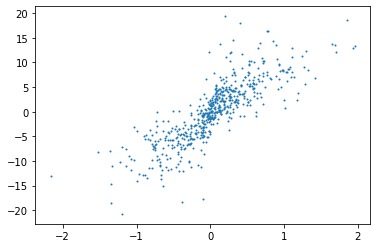

In [213]:
plt.scatter(newdf["pred.chrombpnet.encsr637xsc_50m.varscore.logfc"], newdf["pred.gkmsvm.encsr000emt.varscore.deltasvm"], s=1)

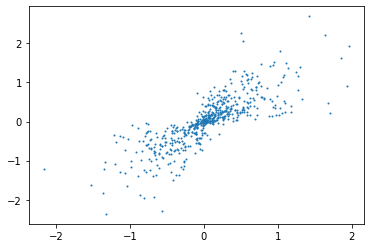

In [214]:
plt.scatter(newdf["pred.chrombpnet.encsr637xsc_50m.varscore.logfc"], newdf["pred.enformer.encsr000emt.varscore.local_logfc"], s=1)

In [208]:
scipy.stats.pearsonr(newdf["pred.chrombpnet.encsr637xsc_50m.varscore.logfc"], newdf["pred.gkmsvm.encsr000emt.varscore.deltasvm"])

(0.8264218390944509, 2.610357160112255e-141)

In [209]:
scipy.stats.pearsonr(newdf["pred.chrombpnet.encsr637xsc_50m.varscore.logfc"], newdf["pred.enformer.encsr000emt.varscore.local_logfc"])

(0.8071744723292618, 7.673152508558958e-130)

In [212]:
scipy.stats.pearsonr(newdf["pred.chrombpnet.encsr637xsc.varscore.logfc"], newdf["pred.chrombpnet.encsr637xsc_50m.varscore.logfc"])

(0.973312376278302, 0.0)

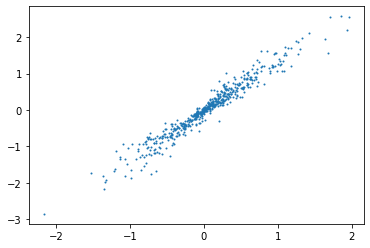

In [189]:
plt.scatter(newdf["pred.chrombpnet.encsr637xsc_50m.varscore.logfc"], newdf["pred.chrombpnet.encsr637xsc.varscore.logfc"], s=1)

In [196]:
newdf[(abs(newdf["pred.chrombpnet.encsr637xsc.varscore.logfc"]) > 1.0) & (abs(newdf["pred.chrombpnet.encsr637xsc_25m.varscore.logfc"]) < 0.3)]

,var.chrom,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips


In [234]:
newdf[(abs(newdf["pred.chrombpnet.encsr637xsc_50m.varscore.logfc"]) > 1.0) & (abs(newdf["pred.enformer.encsr000emt.varscore.local_logfc"]) < 0.25)]

,var.chrom,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
410,chr3,119999621,T,G,rs787202,1,True,1.061,12.183722,0.001058,...,0.490914,0.240430,0.068919,0.857548,1.542522,0.130211,0.099296,0.507238,0.103556,0.015007
306,chr2,20391281,C,G,rs7563253,1,True,1.395,0.766670,-0.000653,...,0.158290,0.229513,0.035464,0.161356,0.620272,0.191968,0.020358,0.212775,0.135474,0.006709
303,chr2,17342057,T,C,rs1396073,1,True,1.356,8.744398,0.000862,...,0.484705,0.097740,0.044197,0.514474,0.779526,0.081831,0.026170,0.329974,0.069764,0.008237
268,chr19,14788486,A,G,rs76943706,1,True,1.500,7.997565,0.001189,...,0.637403,0.126441,0.072883,0.700973,0.820226,0.093474,0.045054,0.359859,0.078785,0.016060


In [247]:
newdf[(abs(newdf["pred.chrombpnet.encsr637xsc_50m.varscore.logfc"]) > 1.0) & (abs(newdf["pred.enformer.encsr000emt.varscore.local_logfc"]) > 1.0)]


#newdf[(abs(newdf["pred.chrombpnet.encsr637xsc_50m.varscore.logfc"]) > 0.8)]

,var.chrom,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
570,chr9,135991219,G,A,rs74734156,1,True,-1.6220,-10.955990,-0.022230,...,0.859768,0.128659,0.082782,1.149839,-1.054812,-0.097857,0.078159,-0.369366,-0.069461,0.017225
523,chr7,108237224,G,T,rs76144775,1,True,1.1690,8.052371,0.002249,...,0.204930,0.299179,0.059315,0.217551,0.861197,0.277101,0.045481,0.272638,0.242283,0.010678
467,chr5,150618993,T,C,rs72794132,1,True,-1.2780,-3.093466,-0.004475,...,0.304990,0.274788,0.077893,0.314057,-0.872374,-0.267241,0.052306,-0.267408,-0.210576,0.011222
466,chr5,137937318,G,A,rs11242436,1,True,0.9855,6.997243,0.007010,...,0.493146,0.093025,0.040465,0.538237,0.852853,0.074192,0.030390,0.395728,0.053673,0.007366
417,chr3,194878063,G,A,rs750470,1,True,0.9927,8.053620,0.014915,...,0.687899,0.088292,0.057154,0.709692,0.967391,0.092217,0.050607,0.281895,0.071430,0.008648
387,chr22,42925131,A,G,rs2413698,1,True,0.9991,12.244517,0.008030,...,0.571482,0.184228,0.080432,0.745055,1.090731,0.111491,0.065357,0.473912,0.083184,0.015098
359,chr20,48585958,T,C,rs73131258,1,True,1.2060,18.674545,0.008480,...,0.654419,0.291587,0.101279,1.218286,1.738351,0.151742,0.162467,0.748674,0.144198,0.043202
314,chr2,45517342,T,C,rs4953223,1,True,-1.1530,-13.131274,-0.002533,...,0.430438,0.417112,0.081813,0.938479,-1.769171,-0.190801,0.133344,-0.698953,-0.149296,0.033836
242,chr17,77083852,C,G,rs74001531,1,True,-0.9836,-20.754752,-0.001341,...,0.546433,0.303466,0.137125,0.667938,-0.784592,-0.229239,0.095662,-0.262317,-0.223948,0.022052
235,chr17,70236669,C,T,rs60805964,1,True,1.1210,11.174321,0.004940,...,0.679356,0.112254,0.067785,0.752954,0.843166,0.092169,0.052828,0.502446,0.081098,0.025993


In [248]:
newdf[(abs(newdf["pred.chrombpnet.encsr637xsc_50m.varscore.logfc"]) > 1.0)].loc[:,["var.chrom", "var.pos_hg19", "var.allele1", "var.allele2", "var.rsid"]].to_csv("/mnt/lab_data2/anusri/chrombpnet/dsqtl_meta_data_small_new.tsv", sep="\t", header=False, index=False)



In [255]:
newdf[newdf["var.rsid"]=="rs11242436"]["pred.chrombpnet.encsr637xsc_50m.varscore.logfc"]

466    1.091536
Name: pred.chrombpnet.encsr637xsc_50m.varscore.logfc, dtype: float64

In [250]:
newdf[newdf["var.rsid"]=="rs11242436"]["pred.gkmsvm.encsr000emt.varscore.deltasvm"]

466    6.997243
Name: pred.gkmsvm.encsr000emt.varscore.deltasvm, dtype: float64

In [251]:


newdf[newdf["var.rsid"]=="rs11242436"]["pred.enformer.encsr000emt.varscore.local_logfc"]

466    1.188561
Name: pred.enformer.encsr000emt.varscore.local_logfc, dtype: float64

In [221]:
newdf = dataf[dataf["obs.label"]==1].sort_values(['var.chrom','var.pos_hg19'],ascending=False)

In [226]:
newdf

,var.chrom,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
573,chr9,140499646,C,T,rs4494021,1,True,0.8279,7.858264,0.001646,...,0.916726,0.001974,0.032355,0.050632,0.031360,0.039969,0.001500,0.012683,0.030208,0.000375
572,chr9,140376668,G,A,rs10116708,1,True,1.0270,4.130903,0.000917,...,0.498460,0.007134,0.011000,0.163987,0.257331,0.026206,0.003634,0.174108,0.030441,0.003031
571,chr9,136811747,A,G,rs2519112,1,True,-0.7492,-8.944194,-0.007446,...,0.464208,0.132887,0.055721,0.520439,-0.924885,-0.123568,0.046317,-0.355947,-0.111057,0.012353
570,chr9,135991219,G,A,rs74734156,1,True,-1.6220,-10.955990,-0.022230,...,0.859768,0.128659,0.082782,1.149839,-1.054812,-0.097857,0.078159,-0.369366,-0.069461,0.017225
569,chr9,133769169,G,A,rs3847193,1,True,0.7767,4.271205,0.000025,...,0.740023,0.030903,0.075640,0.216968,0.333520,0.131947,0.031692,0.051163,0.122563,0.003779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,chr1,1590575,A,G,rs9661285,1,True,-1.0890,-4.785596,-0.008736,...,0.988211,0.006033,0.053680,0.103350,-0.061906,-0.050589,0.003275,-0.032300,-0.023135,0.000802
3,chr1,1227412,A,G,rs112571439,1,True,-0.9236,-3.957382,-0.001878,...,0.521835,0.265543,0.137196,0.518532,-0.622704,-0.222396,0.086945,-0.259064,-0.172960,0.027583
2,chr1,1186502,T,A,rs6603785,1,True,-0.7363,-7.167236,-0.006530,...,0.696101,0.021468,0.029658,0.349964,-0.402188,-0.038791,0.008839,-0.163023,-0.039080,0.002210
1,chr1,911595,G,A,rs7417106,1,True,-0.6285,2.821422,-0.001241,...,0.726685,0.002535,0.027762,0.056287,0.093192,0.036053,0.002239,0.045314,0.034489,0.000898


In [227]:
#newdf[newdf['var.chrom']=="chr3"]

,var.chrom,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
421,chr3,197479257,T,C,rs1606519,1,True,0.7974,9.042312,0.001077,...,0.284606,0.141450,0.036814,0.320128,0.820970,0.111699,0.020781,0.326687,0.096042,0.006301
420,chr3,197185378,T,C,rs56104465,1,True,-1.1810,-2.119043,0.000205,...,0.087627,0.032295,0.008060,0.032856,-0.141641,-0.051438,0.000970,-0.036679,-0.019422,0.000163
419,chr3,195916604,A,G,rs12163558,1,True,1.5500,4.480584,0.000831,...,0.181246,0.010922,0.005976,0.056064,0.166742,0.021537,0.000854,0.058925,0.015999,0.000345
418,chr3,195622041,A,G,rs6762607,1,True,-0.8027,-5.329387,-0.000220,...,0.846271,0.008913,0.050729,0.113948,-0.096817,-0.046875,0.004209,-0.055512,-0.029448,0.001214
417,chr3,194878063,G,A,rs750470,1,True,0.9927,8.053620,0.014915,...,0.687899,0.088292,0.057154,0.709692,0.967391,0.092217,0.050607,0.281895,0.071430,0.008648
416,chr3,185869440,T,C,rs11927308,1,True,0.7692,-0.038336,0.002035,...,0.245315,0.020220,0.014965,0.084408,0.188885,0.045165,0.002038,0.136458,0.045281,0.001688
415,chr3,141759948,C,T,rs75465423,1,True,1.1880,3.870294,0.005238,...,0.448149,0.052323,0.035855,0.286575,0.601119,0.087399,0.022796,0.166630,0.048224,0.002971
414,chr3,137801779,A,G,rs1107422,1,True,-0.7559,-2.722054,-0.001182,...,0.727870,0.009767,0.032854,0.155043,-0.148414,-0.034991,0.003411,-0.164774,-0.026710,0.003191
413,chr3,124642835,C,T,rs9859266,1,True,-0.8159,0.389019,-0.000335,...,0.064995,0.016157,0.005645,0.014409,-0.151305,-0.074726,0.000603,-0.003055,-0.006213,0.000004
412,chr3,124487849,A,G,rs2291082,1,True,1.2420,4.170800,0.000543,...,0.032195,0.012478,0.001626,0.006196,0.052687,0.032542,0.000129,-0.043158,-0.014077,0.000053


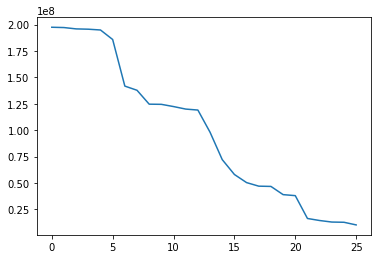

In [228]:
plt.plot(newdf[newdf['var.chrom']=="chr3"]["var.pos_hg19"].values)

In [229]:
diff = newdf["var.pos_hg19"].diff()

In [230]:
mask = diff.abs() < 1000


In [231]:
#np.sort(diff.abs())

In [232]:
sum(mask)

4

In [233]:
diff[mask]

463    -27.0
452    -72.0
298   -170.0
61     -73.0
Name: var.pos_hg19, dtype: float64

In [161]:
newdf.loc[463:469,:]

,var.chrom,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
463,chr5,132866975,C,G,rs823991,1,True,-0.9007,-5.587800,0.000064,...,0.636967,0.013091,0.035124,0.147120,-0.222111,-0.060891,0.007337,-0.070184,-0.030603,0.000965
464,chr5,132867002,G,A,rs823992,1,True,-0.7486,-12.801433,-0.001295,...,0.651068,0.054868,0.039140,0.570535,-0.767703,-0.068672,0.028155,-0.232271,-0.053321,0.005319
465,chr5,133882639,C,A,rs4958189,1,True,1.0950,5.268227,0.001057,...,0.117665,0.040962,0.008801,0.067814,0.433198,0.067040,0.003490,0.167892,0.055930,0.001061
466,chr5,137937318,G,A,rs11242436,1,True,0.9855,6.997243,0.007010,...,0.493146,0.093025,0.040465,0.538237,0.852853,0.074192,0.030390,0.395728,0.053673,0.007366
467,chr5,150618993,T,C,rs72794132,1,True,-1.2780,-3.093466,-0.004475,...,0.304990,0.274788,0.077893,0.314057,-0.872374,-0.267241,0.052306,-0.267408,-0.210576,0.011222
468,chr5,153577099,G,A,rs55946756,1,True,0.8093,4.002773,-0.004448,...,0.440272,0.060155,0.068781,0.167274,0.254969,0.145468,0.015291,0.205392,0.163947,0.012600
469,chr5,153618712,G,C,rs74396372,1,True,-1.1710,-3.859885,-0.003950,...,0.367339,0.042817,0.023402,0.237060,-0.459853,-0.051568,0.008282,-0.038226,-0.011883,0.000215


In [163]:
newdf.loc[61:63,:]

,var.chrom,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
61,chr10,75911342,G,C,rs10824083,1,True,0.7581,3.211179,0.000211,...,0.871857,0.019301,0.064960,0.224810,0.187870,0.078877,0.013863,0.075078,0.046417,0.002973
62,chr10,75911415,C,T,rs10824084,1,True,0.6487,1.465231,0.000297,...,0.789447,0.000581,0.011063,0.032909,0.048786,0.014944,0.000629,0.021391,0.013766,0.000238
63,chr10,80197361,T,G,rs77570953,1,True,1.5330,1.840004,0.001089,...,0.436784,0.009559,0.012995,0.118076,0.093123,0.017480,0.000633,0.003827,0.009344,0.000069


In [168]:
newdf.loc[298:300,:]

,var.chrom,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
298,chr2,9983686,T,G,rs2303914,1,True,-0.5864,-4.072223,-0.001447,...,0.984103,0.000259,0.023705,0.010022,-0.005048,-0.031338,0.000382,-0.004709,-0.019532,0.000191
299,chr2,9983856,G,A,rs115657324,1,True,-1.2130,-1.512685,-0.000372,...,0.967353,0.000561,0.020542,0.025420,-0.049169,-0.017865,0.000857,-0.026088,-0.013528,0.000340
300,chr2,10169300,C,G,rs6741776,1,True,-0.7245,-4.875526,-0.005955,...,0.749257,0.022688,0.054489,0.232308,-0.226588,-0.065657,0.011126,-0.113183,-0.051654,0.004025


In [169]:
newdf.loc[452:457,:]

,var.chrom,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
452,chr5,34452510,C,T,rs6451097,1,True,1.0060,8.665144,0.000159,...,0.215498,0.050969,0.035547,0.070687,0.158468,0.130611,0.004071,0.103375,0.143592,0.003862
453,chr5,34452582,G,A,rs6451098,1,True,1.0690,-3.237986,0.000015,...,0.236626,0.001829,0.003394,0.024061,-0.035114,-0.013992,0.000111,-0.005684,-0.010481,0.000086
454,chr5,40437845,A,G,rs9292776,1,True,-0.7408,-6.748464,0.000189,...,0.714247,0.010964,0.024564,0.224446,-0.307851,-0.030032,0.006440,-0.127723,-0.022915,0.002014
455,chr5,56205357,A,G,rs185220,1,True,-0.7502,-6.541892,-0.004433,...,0.984001,0.020791,0.074527,0.264613,-0.210279,-0.069660,0.014472,-0.135177,-0.062595,0.008270
456,chr5,59020526,T,G,rs56763295,1,True,-0.5926,-9.648554,-0.000408,...,0.012719,0.135030,0.002963,0.007731,-0.527439,-0.225615,0.002815,-0.328706,-0.278949,0.005039


In [114]:
newdf.iloc[60:63]["pred.chrombpnet.encsr637xsc.varscore.logfc"]

61    0.145453
62    0.048056
63    0.463644
Name: pred.chrombpnet.encsr637xsc.varscore.logfc, dtype: float64

In [108]:
# Shift the mask by one row to identify the previous row in the pair
mask_shifted = mask.shift(-1)

# Combine the masks to find consecutive rows
consecutive_mask = mask & mask_shifted

# Return the rows that meet the criteria
newdf[mask]

,var.chrom,var.pos_hg19,var.allele1,var.allele2,var.rsid,obs.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.global_sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.aaq,pred.chrombpnet.encsr637xsc_50m.varscore.ies,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.ips,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.ips
62,chr10,75911415,C,T,rs10824084,1,True,0.6487,1.465231,0.000297,...,0.789447,0.000581,0.011063,0.032909,0.048786,0.014944,0.000629,0.021391,0.013766,0.000238
299,chr2,9983856,G,A,rs115657324,1,True,-1.2130,-1.512685,-0.000372,...,0.967353,0.000561,0.020542,0.025420,-0.049169,-0.017865,0.000857,-0.026088,-0.013528,0.000340
453,chr5,34452582,G,A,rs6451098,1,True,1.0690,-3.237986,0.000015,...,0.236626,0.001829,0.003394,0.024061,-0.035114,-0.013992,0.000111,-0.005684,-0.010481,0.000086
464,chr5,132867002,G,A,rs823992,1,True,-0.7486,-12.801433,-0.001295,...,0.651068,0.054868,0.039140,0.570535,-0.767703,-0.068672,0.028155,-0.232271,-0.053321,0.005319


nan

In [72]:
dataf[dataf["var.rsid"]=="rs76943706"]["pred.enformer.encsr000emt.varscore.local_logfc"]

268    0.246145
Name: pred.enformer.encsr000emt.varscore.local_logfc, dtype: float64

In [75]:
dataf[dataf["var.rsid"]=="rs76943706"]["pred.chrombpnet.encsr637xsc_50m.varscore.logfc"]

268    1.1031
Name: pred.chrombpnet.encsr637xsc_50m.varscore.logfc, dtype: float64

In [60]:
dataf[dataf["var.rsid"]=="rs7094325"]["obs.estimate"]

69   -1.154
Name: obs.estimate, dtype: float64

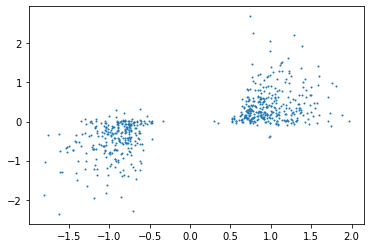

In [61]:
plt.scatter(dataf["obs.estimate"], dataf["pred.enformer.encsr000emt.varscore.local_logfc"], s=1)



In [85]:
import pickle as pkl
import os
enformer_recompute = pkl.load(open(os.path.join("/mnt/lab_data2/anusri/variant-scorer/src/output/dsqtls_lcl/enformer_preds_small_window/predictions_at_snp.pkl"),'rb'))
mean_change=[]
for i in range(data.shape[0]):
    mean_change.append(np.log2( (enformer_recompute["ref_logcount_preds"][i,440+4:456-4].sum()+1) / (enformer_recompute["alt_logcount_preds"][i,440+4:456-4].sum()+1)))

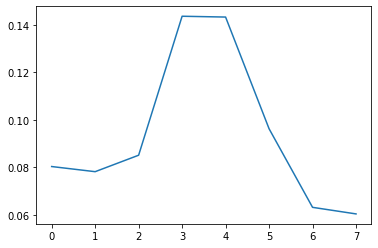

In [91]:
plt.plot(enformer_recompute["ref_logcount_preds"][410,440+4:456-4])

In [90]:
mean_change[410]

0.22869224994648316

In [ ]:
print